# Entrelazamiento Cuántico

### 1 Qubit Quantum State
The orthogonal components of the Bloch sphere are the main states of a qubit. Here, I present the 6 states in bra-ket notation.


$$ \left| \psi \right> = \sqrt{1 - p} \left| 0 \right> + e^{j\phi}\sqrt{p}\left| 1 \right>$$

$$ \left| 0 \right> = \left(\begin{array}{c} 1 \\ 0 \end{array}\right) \ \ \ \ \ \ \ \ \left| 1 \right> = \left(\begin{array}{c} 0 \\ 1 \end{array}\right)$$ 

$$ \left| + \right> = \frac{1}{\sqrt{2}}(\left| 0 \right> + \left| 1 \right>) = \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ 1 \end{array}\right)   
\ \ \ \ \ \ \ \
\left| - \right> = \frac{1}{\sqrt{2}}(\left| 0 \right> - \left| 1 \right>) \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ -1 \end{array}\right)$$ 

$$ \left| +j \right> = \frac{1}{\sqrt{2}}(\left| 0 \right> + i\left| 1 \right>) = \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ 1 \end{array}\right)   
\ \ \ \ \ \ \ \
\left| -j \right> = \frac{1}{\sqrt{2}}(\left| 0 \right> - i\left| 1 \right>) \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ -1 \end{array}\right)$$ 


### Gates
The gates for obtaining the rotations about such axis are:

$$X = \sigma_x = \left(\begin{array}{cc} 0 & 1 \\ 1 & 0 \end{array}\right)\ \ \ \ \ \ \ \ Y = \sigma_y = \left(\begin{array}{cc} 0 & -i \\ i & 0 \end{array}\right) \ \ \ \ \ \ \ \ Z = \sigma_z = \left(\begin{array}{cc} 1 & 0 \\ 0 & -1 \end{array}\right)$$

$$H = \frac{1}{\sqrt{2}} \left(\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right)\ \ \ \ \ \ \ \ S = \left(\begin{array}{cc} 1 & 0 \\ 0 & -i \end{array}\right)\ \ \ \ \ \ \ \ S^\dagger = \left(\begin{array}{cc} 1 & 0 \\ 0 & i \end{array}\right)$$

Some examples of such rotations are: 

$$X \left| 0 \right> =  \left| 1 \right>\ \ \ \ \ \ \ \ H \left| 0 \right> =  \left| + \right> \ \ \ \ \ \ \ \ SH\left| 0 \right> = \left| +j \right>$$





In [107]:
# Important functions and libraries from qiskit
import qiskit as qk 
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit import Aer

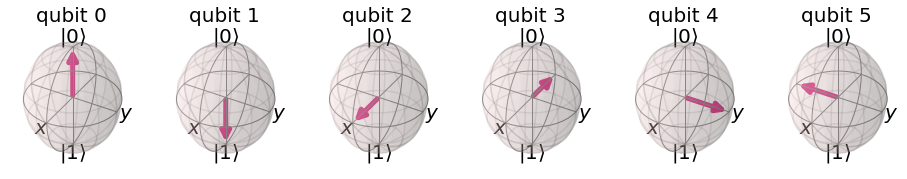

In [115]:
qc = qk.QuantumCircuit(6) # Create a quantum circuit with six qubits
qc.x(1) #Apply a not gate or X to qubit 0 
qc.h(2) # |+>
qc.x(3);qc.h(3) # |->
qc.h(4);qc.s(4) # |+j>
qc.h(5);qc.sdg(5) # |-j>
qc.draw('mpl') # Visualize the circuit with matplotlib or 'mpl'
backend = Aer.get_backend('statevector_simulator') # Get the backend (Device in which the circuit is simulated)
result = qk.execute(qc,backend).result() # Execution of the circuit using the backend = 'statevector_simulator'
plot_bloch_multivector(result.get_statevector())# Visulize the Bloch vector sphere

### Producto Kronecker  
The Kronecker product allows us to represent multiple qubits in one vector. However, when we increase the number of qubits the Bloch vector will not allow us to represent it in the Bloch spehere if we have an entanglement state.

$$A \otimes B = \left( \begin{array}{ccc} a_{11} B & \cdots & a_{1n}B \\ \vdots & \ddots & \vdots \\ a_{m1}B & \cdots & a_{mn}B \end{array}\right)$$

$$\left| 0 \right> \otimes \left| 0 \right> = \left| 00 \right> = \left(\begin{array}{c}1 \left(\begin{array}{c}1 \\0\end{array}\right)\\1\left(\begin{array}{c}1\\0\end{array}\right)\end{array}\right)= \left(\begin{array}{c}1\\0\\0\\0 \end{array}\right)$$


### CNOT gate
The CNOT gate or "controlled Not gate" is one of the fundamental blocks in quantum Computing. It allows to generate entanglement between qubits when combines with the Hamadard gate. 


$$ CNOT_{c,t} = \left(\begin{array}{cccc}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0 \end{array}\right)$$

$$CNOT\left| 00 \right> = \left| 00 \right>$$

$$CNOT\left| 10 \right> = \left| 11 \right>$$

$$CNOT\left(\left| +\right> \otimes \left|0 \right>\right) = \frac{1}{\sqrt{2}}(\left| 00 \right> + \left| 11 \right>)$$






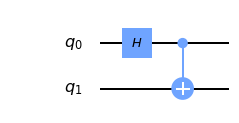

In [106]:
circuito = qk.QuantumCircuit(2) # Create a quantum circuit with two qubits
circuito.h(0) #Apply a Hadamard gate to qubit 0
circuito.cx(0,1) # Apply a CNOT gate with qubit 0 as control and qubit 1 as target 
circuito.draw('mpl') # Visualize the circuit with matplotlib or 'mpl'

In [90]:
backend = Aer.get_backend('statevector_simulator') # Get the backend (Device in which the circuit is simulated)
result = qk.execute(circuito,backend).result() # Execution of the circuit using the backend = 'statevector_simulator'

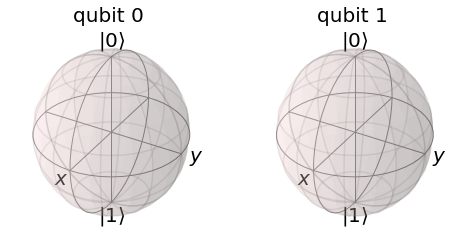

In [91]:
plot_bloch_multivector(result.get_statevector())# Visulize the Bloch vector sphere

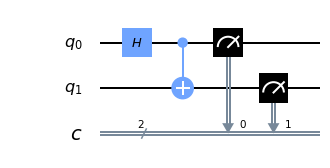

In [96]:
backend = Aer.get_backend('qasm_simulator') #Simulate the outcome of a circuit in terms of probability 
qc = qk.QuantumCircuit(2,2) # Create a new circuit with 2 qubits and two lines of measurement
qc.h(0) #applying a Hamadard
qc.cx(0,1)# applying a CNOT gate
qc.measure([0,1],[0,1]) #Measure the qubit 0 and qubit one in lines 0 and 1
qc.draw('mpl') # draw the circuit using 'matplotlib'

In [97]:
result = qk.execute(qc,backend).result().get_counts() # Executing the circuit on our pc

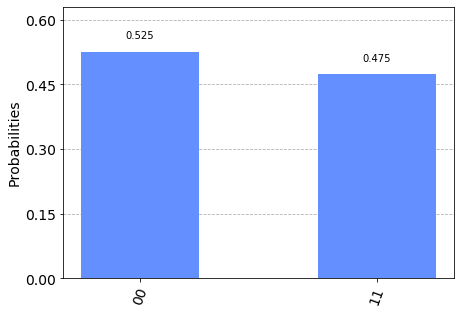

In [98]:
plot_histogram(result) #Results in terms of probability of the different states (ideal!!)

In [100]:
from qiskit import IBMQ
provider = IBMQ.load_account() #Load the qiskit account got from IBMQ

ibmqfactory.load_account:WARNING:2020-07-20 15:52:32,671: Credentials are already in use. The existing account in the session will be replaced.


In [104]:
backend = provider.get_backend('ibmq_essex') # Backend as a Real quantum device
result = qk.execute(qc,backend).result().get_counts() # Get the probability of executing the circuit on the essex device

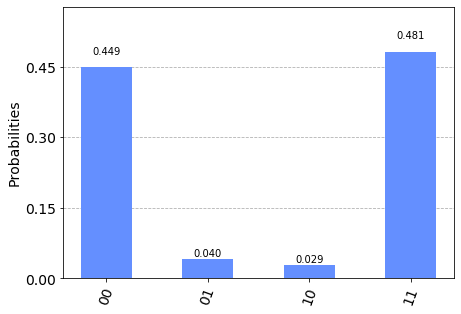

In [105]:
plot_histogram(result) # Plot histogram of a real device some error is expected.